In [1]:
import os
import fnmatch
import pandas as pd
from os.path import isfile, join
import matplotlib.pyplot as plt
import numpy as np

# Total Charge evolution

In [2]:
data_directory =  "/media/Carol/Magnetic/Experiments/Colloidal_Ice/Cairo_lattice/29-03-2022/Processed_vid"

In [3]:
Cairo = []
for file in os.listdir(data_directory):
    if fnmatch.fnmatch(file, "vertices_h=3_w=2_Exp*.dat"):
        print(file)
        Cairo.append(pd.read_csv(join(data_directory,file), sep = "\t", index_col = [0,1])) 
        
keys_Cairo = []
for i in range(len(Cairo)):
    keys_Cairo.append(i)

vertices_h=3_w=2_Exp8.dat
vertices_h=3_w=2_Exp7.dat
vertices_h=3_w=2_Exp1.dat
vertices_h=3_w=2_Exp3.dat
vertices_h=3_w=2_Exp2.dat
vertices_h=3_w=2_Exp5.dat
vertices_h=3_w=2_Exp4.dat
vertices_h=3_w=2_Exp6.dat
vertices_h=3_w=2_Exp0.dat


In [4]:
Cairo_exp = pd.concat(Cairo, keys = keys_Cairo)
Cairo_exp.index.names = ['Exp', 'frame', 'id']

(67.92616526188812, 333.46078031049694, 66.3769889558158, 330.8463324141322)

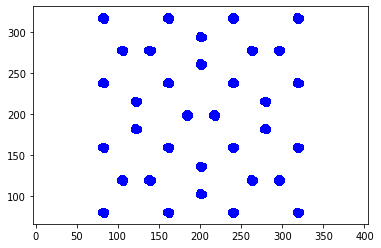

In [5]:
plt.plot(Cairo_exp.x,Cairo_exp.y, 'o', c= 'blue' )
plt.axis('equal')

## First method

As far as the analyzed system has 2 3-coordination vertices for each 4-oordination vertex we need to preserve this proportion in order to reproduce data from simulations. To do that, we can only made the analysis of 3 vertices (two 3-coordination and one 4-coordination). But we will loose a lot of data doing that. Instead we propose to weight each vertex. Vertices at the corners will have a weight of 1/4 (Only one particle inside the structure). At the edges 1/2 and inside the boundaries 1.

In [6]:
Cairo_exp['weigth'] = 1

In [7]:
Cairo_exp.loc[(Cairo_exp['x'] < 100) & (Cairo_exp['y'] < 300) & (Cairo_exp['y'] > 140) , 'weigth'] = 1/2
Cairo_exp.loc[(Cairo_exp['x'] > 305) & (Cairo_exp['y'] < 300) & (Cairo_exp['y'] > 140) , 'weigth'] = 1/2

Cairo_exp.loc[(Cairo_exp['y'] > 300) & (Cairo_exp['x'] > 100) & (Cairo_exp['x'] < 300) , 'weigth'] = 1/2
Cairo_exp.loc[(Cairo_exp['y'] < 100) & (Cairo_exp['x'] > 100) & (Cairo_exp['y'] < 300) , 'weigth'] = 1/2

Cairo_exp.loc[(Cairo_exp['x'] < 100) & (Cairo_exp['y'] > 300)  , 'weigth'] = 1/4
Cairo_exp.loc[(Cairo_exp['x'] < 100) & (Cairo_exp['y'] < 100)  , 'weigth'] = 1/4
Cairo_exp.loc[(Cairo_exp['x'] > 300) & (Cairo_exp['y'] < 100)  , 'weigth'] = 1/4
Cairo_exp.loc[(Cairo_exp['x'] > 300) & (Cairo_exp['y'] > 300)  , 'weigth'] = 1/4

In [8]:
edges = Cairo_exp.query('weigth == 1/2')
corners = Cairo_exp.query('weigth == 1/4')
bulk =  Cairo_exp.query('weigth == 1')

(67.92616526188812, 333.46078031049694, 66.3769889558158, 330.8463324141322)

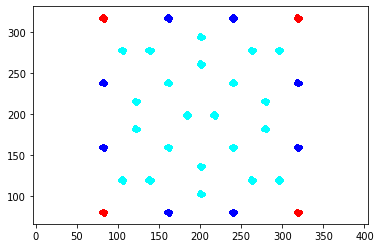

In [9]:
plt.plot(edges.x, edges.y ,'.', color = 'blue')
plt.plot(corners.x, corners.y ,'.', color = 'red')
plt.plot(bulk.x, bulk.y ,'.', color = 'cyan')
plt.axis('equal')

## Second method

In [44]:
Ca = Cairo_exp.query('x < 230 and x > 150')
C = Ca.query('y > 180 and y < 250')

(155.74617083282357, 222.8579376411148, 194.43466106517812, 242.1798166590824)

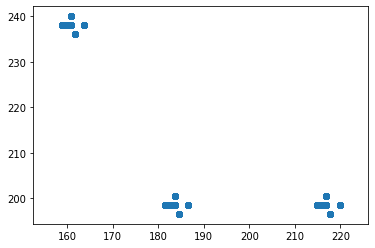

In [45]:
plt.plot(C.x, C.y, 'o')
plt.axis('equal')

In [46]:
C.groupby(['frame','coordination']).count()

x   y  charge  dx  dy  weigth
frame coordination                                
0     3             18  18      18  18  18      18
      4              9   9       9   9   9       9
100   3             18  18      18  18  18      18
      4              9   9       9   9   9       9
200   3             18  18      18  18  18      18
...                 ..  ..     ...  ..  ..     ...
4200  4              2   2       2   2   2       2
4300  3              2   2       2   2   2       2
      4              1   1       1   1   1       1
4400  3              2   2       2   2   2       2
      4              1   1       1   1   1       1

[90 rows x 6 columns]

In [47]:
C.groupby(['frame','coordination']).sum()

x            y  charge         dx   dy  weigth
frame coordination                                                          
0     3             3603.482510  3574.888117       4 -12.000000  0.0    18.0
      4             1447.189140  2142.067747       2   1.732051  1.0     9.0
100   3             3603.482510  3574.888117       4 -12.000000  0.0    18.0
      4             1447.189140  2142.067747       2   1.732051  1.0     9.0
200   3             3603.482510  3574.888117       4 -12.000000  0.0    18.0
...                         ...          ...     ...        ...  ...     ...
4200  4              324.598109   476.013662       0   0.000000  0.0     2.0
4300  3              406.386946   397.209791       4   2.000000  0.0     2.0
      4              163.794289   238.004080       0   0.000000  0.0     1.0
4400  3              406.386946   397.209791       4   2.000000  0.0     2.0
      4              163.794289   238.004080       0   0.000000  0.0     1.0

[90 rows x 6 columns]

In [58]:
C = Cairo_exp.groupby(['frame']).sum()/Cairo_exp.groupby('frame').count()

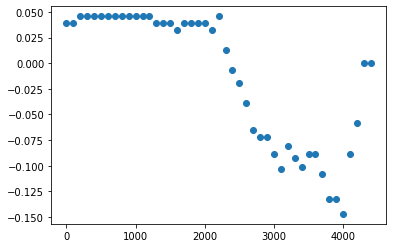

In [59]:
plt.plot(C.index.get_level_values('frame'),C.charge, 'o')

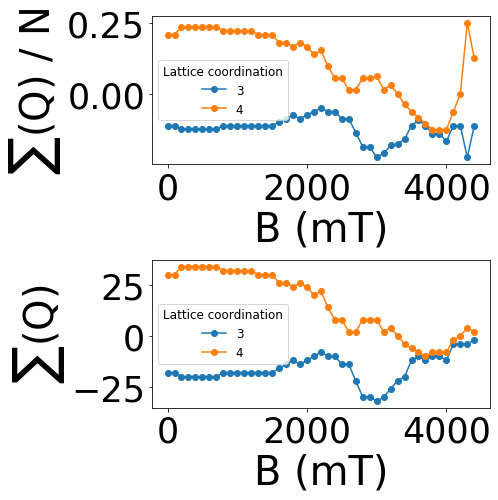

In [61]:
fig, ax = plt.subplots(2, 1, figsize=(7,7))

Sep_charge_tot = Cairo_exp.groupby(['frame','coordination']).sum()

Sep_charge = Cairo_exp.groupby(['frame','coordination']).sum()/Cairo_exp.groupby(['frame','coordination']).count()

for typ_m, mtype in Sep_charge.groupby('coordination'):
    
    ax[0].plot(mtype.index.get_level_values("frame"), mtype['charge'],'-o', label = typ_m)
    
for typ_m, mtype in Sep_charge_tot.groupby('coordination'):
    
    ax[1].plot(mtype.index.get_level_values("frame"), mtype["charge"],'-o', label = typ_m)

    
ax[0].tick_params(axis='y', labelsize=35)
ax[0].tick_params(axis='x', labelsize=35) 
ax[0].legend(fontsize = 12, title= 'Lattice coordination', title_fontsize = 12, ncol = 1)


ax[0].set_xlabel('B (mT)', size = 40)
ax[0].set_ylabel('$\sum$(Q) / N', size = 40)

ax[1].tick_params(axis='y', labelsize=35)
ax[1].tick_params(axis='x', labelsize=35)  

ax[1].legend(fontsize = 12, title= 'Lattice coordination', title_fontsize = 12, ncol = 1)
ax[1].set_xlabel('B (mT)', size = 40)
ax[1].set_ylabel('$\sum$(Q)', size = 40)


plt.tight_layout()